In [3]:
# ========================
# 1. Download & Extract Dataset
# ========================
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download salader/dogs-vs-cats

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/salader/dogs-vs-cats


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/dogs-vs-cats.zip'

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten, GlobalAveragePooling2D # Added GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16

In [7]:
# ========================
# 3. Load Pre-trained VGG16 Model
# ========================
conv_base = VGG16(
    weights='imagenet',
    include_top=False,          # top fully connected layers remove
    input_shape=(224,224,3)     # VGG16 recommended input size
)

# Freeze convolutional base (weights not trainable)
conv_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# ========================
# 4. Build Transfer Learning Model
# ========================
model = Sequential([
    conv_base,
    GlobalAveragePooling2D(),   # Flatten ki jagah recommended hai
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')   # binary classification
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
conv_base.trainable = False

In [11]:
# ========================
# 5. Load Dataset
# ========================
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(224,224),
    shuffle=True
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(224,224),
    shuffle=True
)

# Normalize images (0-1 range)
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

NotFoundError: Could not find directory /content/train

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds,)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 409ms/step - accuracy: 0.8160 - loss: 0.4060 - val_accuracy: 0.9222 - val_loss: 0.1996
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 164s 360ms/step - accuracy: 0.9146 - loss: 0.2083 - val_accuracy: 0.9144 - val_loss: 0.1969
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 416ms/step - accuracy: 0.9208 - loss: 0.1911 - val_accuracy: 0.9280 - val_loss: 0.1768
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 360ms/step - accuracy: 0.9229 - loss: 0.1855 - val_accuracy: 0.9266 - val_loss: 0.1685
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 416ms/step - accuracy: 0.9293 - loss: 0.1711 - val_accuracy: 0.9258 - val_loss: 0.1793
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 361ms/step - accuracy: 0.9306 - loss: 0.1705 - val_accuracy: 0.9270 - val_loss: 0.1645
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 361ms/step - accuracy: 0.9295 - loss: 0.1722 - val_accuracy: 0.9298 - val_loss: 0.1583
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 416ms/step - accuracy: 0.9342 -

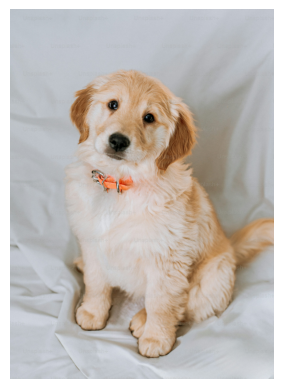

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Raw prediction: 0.4517222
Prediction → Cat 🐱


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Read image & convert to RGB
test_image = cv2.imread('/content/dogs.jpeg')   # apni image ka path dijiye
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.imshow(test_image)
plt.axis("off")
plt.show()

# 2. Resize same as model input (224x224 for VGG16)
test_image = cv2.resize(test_image, (224,224))

# 3. Normalize (0-1 range)
test_input = test_image.astype('float32') / 255.0
test_input = np.expand_dims(test_input, axis=0)   # shape: (1,224,224,3)

# 4. Predict
prediction = model.predict(test_input)
print("Raw prediction:", prediction[0][0])

# 5. Human-readable output
if prediction[0][0] < 0.5:
    print("Prediction → Cat 🐱")
else:
    print("Prediction → Dog 🐶")